In [2]:
# --- Celda 1: Importar librerías y definir ruta ---
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Ruta local al dataset
folder_path = r"C:\Users\Felix\Downloads\all_images"  # Ajusta según tu entorno

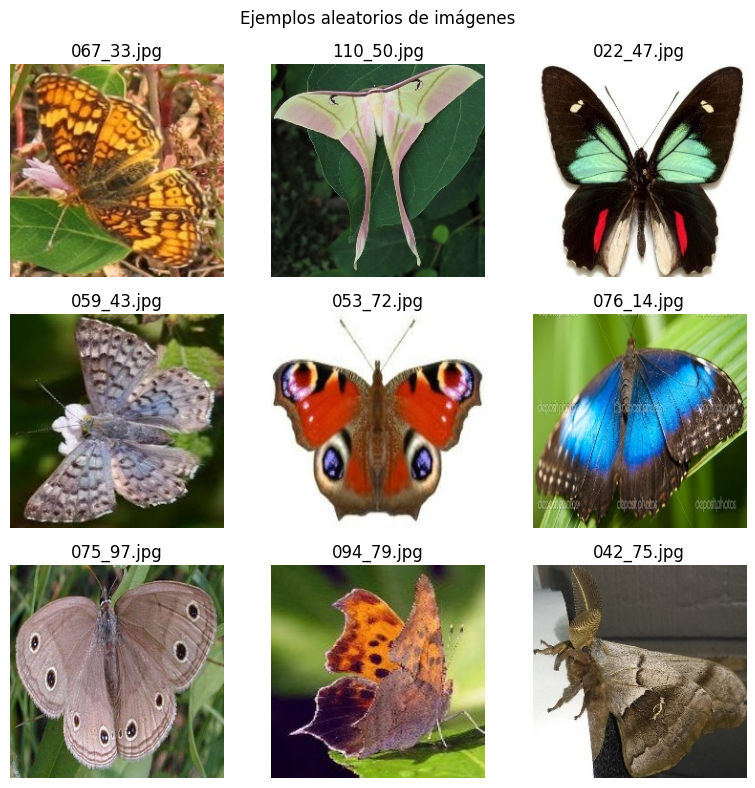

In [3]:
# --- Celda 2: Mostrar ejemplos aleatorios de imágenes antes de procesar ---
def mostrar_ejemplos(path, n=9):
    archivos = [f for f in os.listdir(path) if f.lower().endswith('.jpg')]
    seleccion = random.sample(archivos, n)
    plt.figure(figsize=(8,8))
    for i, fname in enumerate(seleccion,1):
        img = Image.open(os.path.join(path, fname))
        plt.subplot(3,3,i)
        plt.imshow(img)
        plt.title(fname)
        plt.axis('off')
    plt.suptitle('Ejemplos aleatorios de imágenes')
    plt.tight_layout()
    plt.show()

mostrar_ejemplos(folder_path)


In [6]:
# --- Celda 3: Carga de imágenes, resizing a 64x64 y extracción de características ---
image_list = []
filenames = []
for fname in os.listdir(folder_path):
    if fname.lower().endswith('.jpg'):
        path = os.path.join(folder_path, fname)
        img = Image.open(path).resize((64,64))  # Reducimos a 64x64 como en el cuadernillo base
        arr = np.array(img, dtype=np.float32)
        flat = arr.flatten()
        image_list.append(flat)
        filenames.append(fname)

X = np.vstack(image_list)  # Shape: (n_imágenes, 64*64*3)
print(f"Cargadas {X.shape[0]} imágenes con {X.shape[1]} características (64x64x3). Dtype={X.dtype}.")


Cargadas 13594 imágenes con 12288 características (64x64x3). Dtype=float32.


In [7]:
# --- Celda 4: Normalización de características ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Ahora usa menos memoria
print("Características escaladas.")

Características escaladas.


In [8]:
# --- Celda 5: Aplicar K-Means ---
# Definimos 100 clusters (una por especie)
kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_
print("K-Means completado.")

K-Means completado.


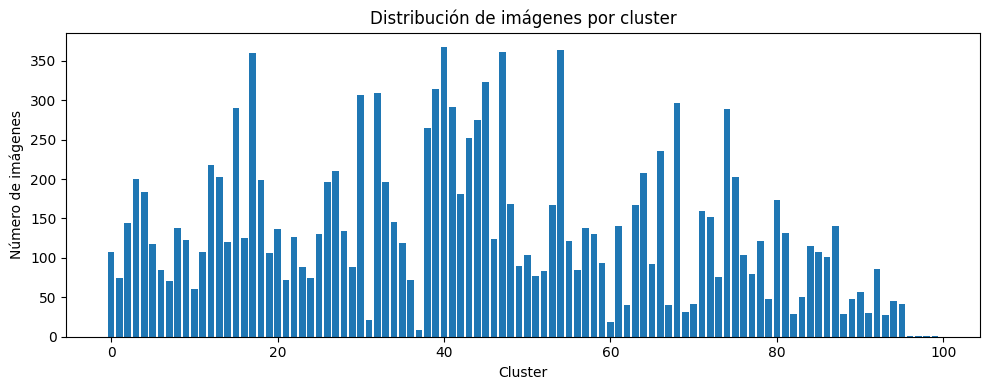

In [9]:
# --- Celda 6: Distribución de clusters ---
from collections import Counter
dist = Counter(clusters)
# Mostrar como gráfico de barras
plt.figure(figsize=(10,4))
plt.bar(range(len(dist)), list(dist.values()))
plt.xlabel('Cluster')
plt.ylabel('Número de imágenes')
plt.title('Distribución de imágenes por cluster')
plt.tight_layout()
plt.show()

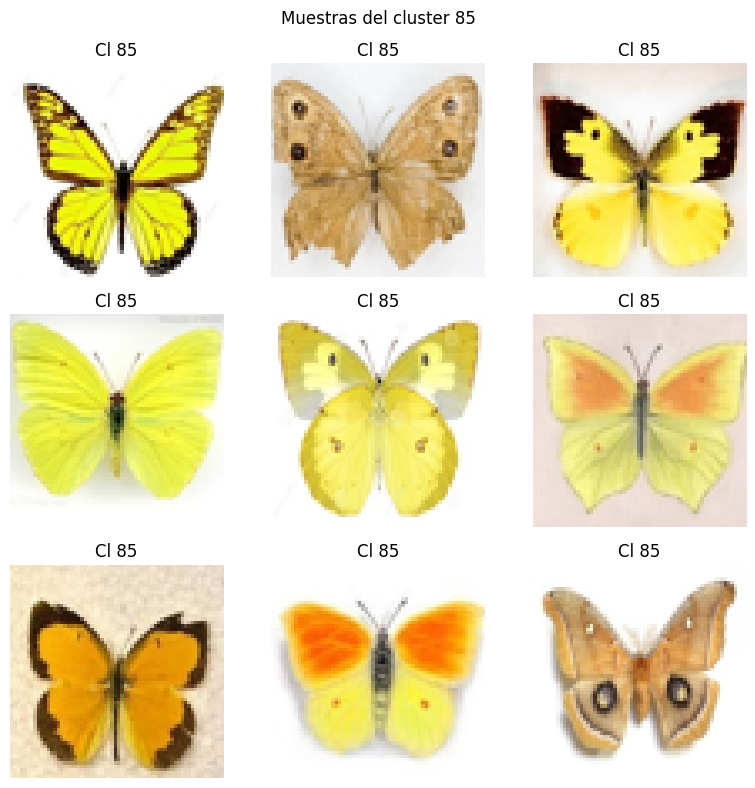

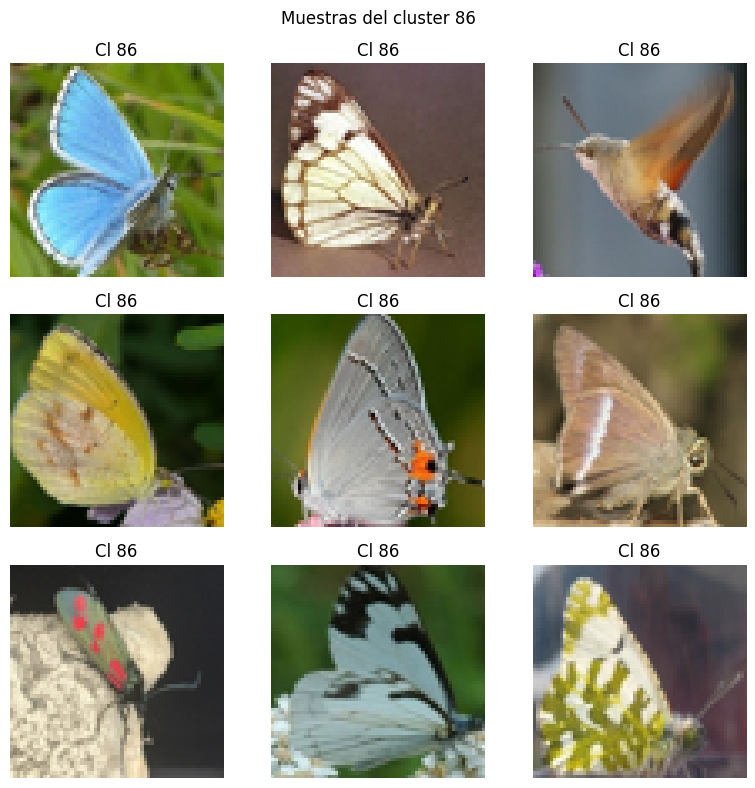

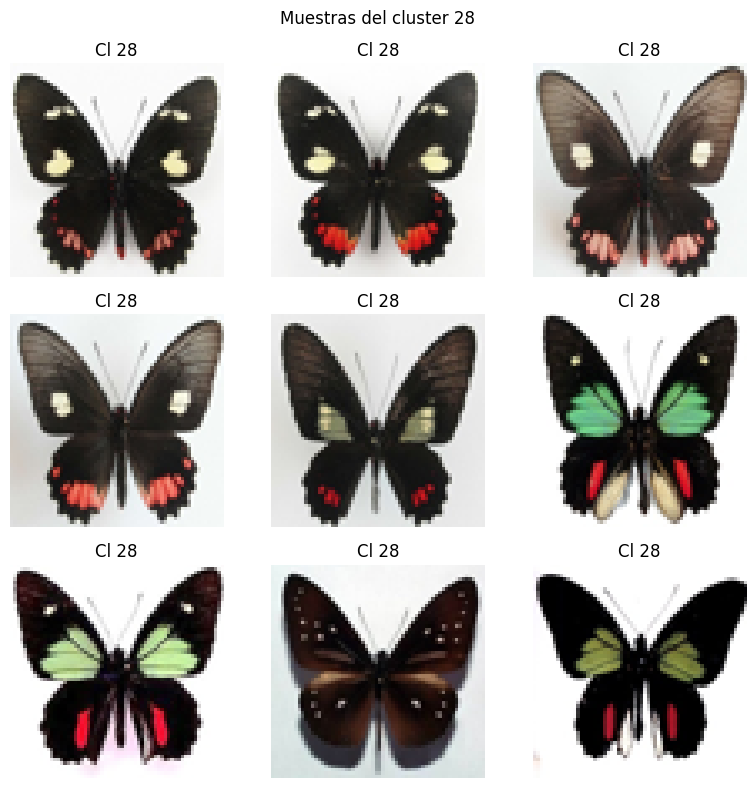

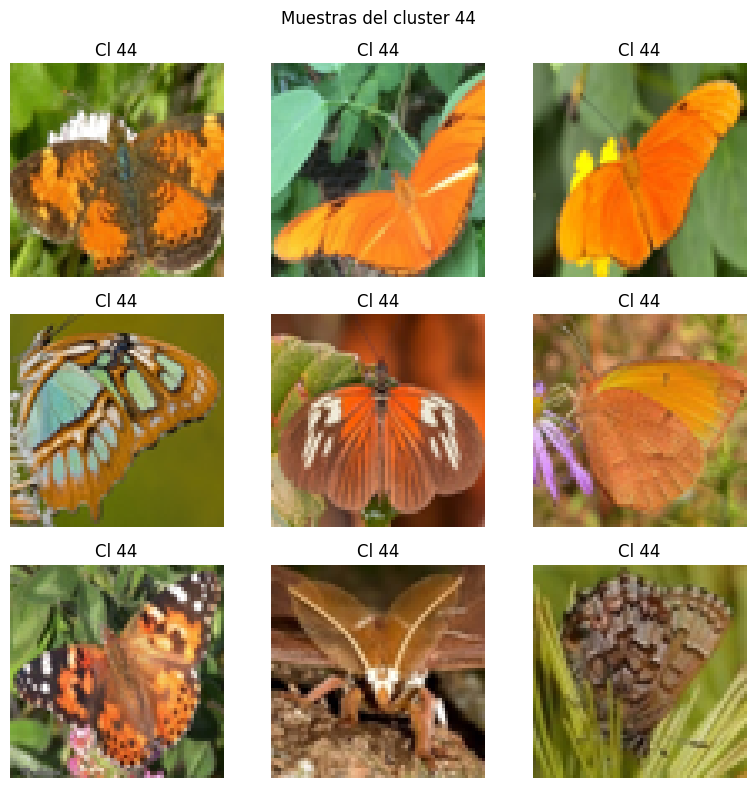

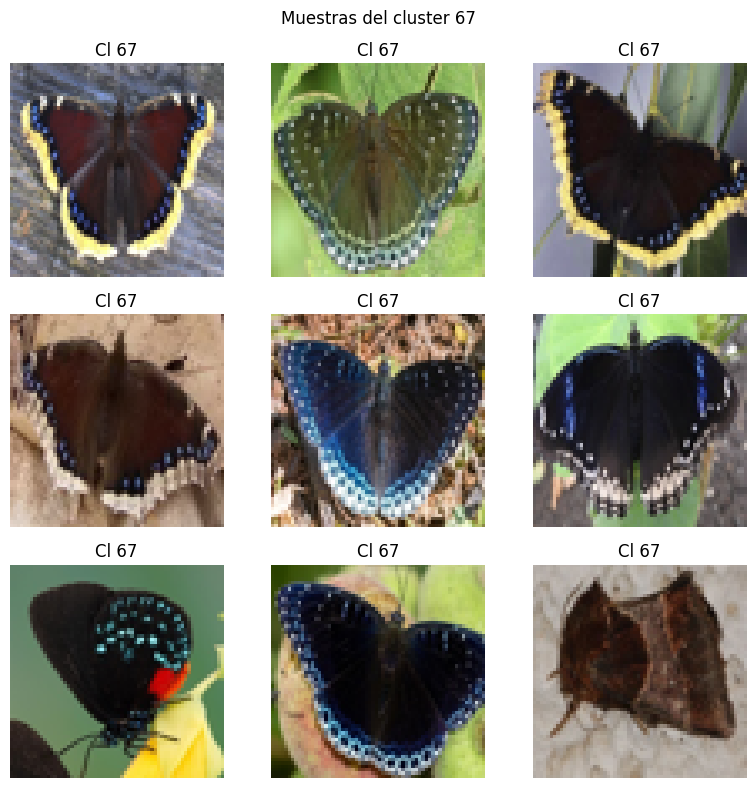

In [10]:
# --- Celda 7: Visualizar muestras por cluster ---
# Elegimos 5 clusters al azar para inspeccionar
clusters_ejemplo = random.sample(list(dist.keys()), 5)
for cluster_id in clusters_ejemplo:
    idxs = [i for i, c in enumerate(clusters) if c == cluster_id][:9]
    plt.figure(figsize=(8,8))
    for i, idx in enumerate(idxs,1):
        img = Image.open(os.path.join(folder_path, filenames[idx])).resize((64,64))
        plt.subplot(3,3,i)
        plt.imshow(img)
        plt.title(f"Cl {cluster_id}")
        plt.axis('off')
    plt.suptitle(f'Muestras del cluster {cluster_id}')
    plt.tight_layout()
    plt.show()